<a href="https://colab.research.google.com/github/hanna-joo/statistics/blob/master/stat_python/ch_04_data_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 준비하기
- 한글 폰트 설정
- 구글 드라이브 연동하기

In [41]:
# 한글 파일 설정
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
# 런타임 다시 시작하기

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [1]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf


In [3]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

Text(0.3, 0.3, '한글')

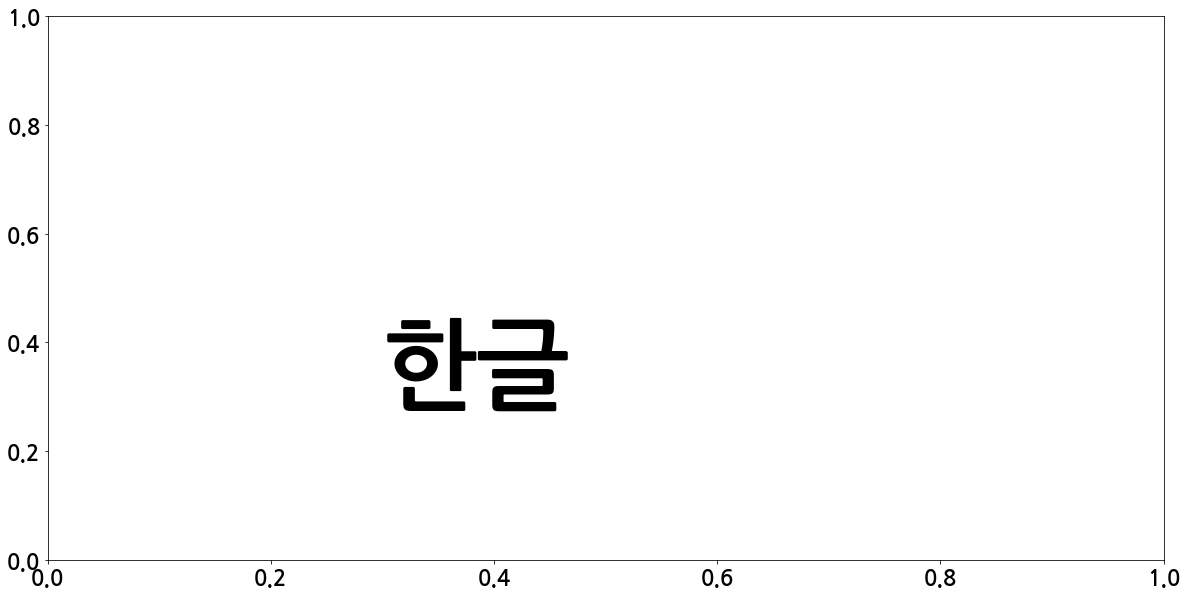

In [4]:
font = {'family' : 'NanumGothic',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.text(0.3, 0.3, '한글', size=100)

In [7]:
# 구글 드라이브 연동
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)       
          # print content of ROOT (Optional)
drive.mount(ROOT, force_remount=True)

/content/drive
Mounted at /content/drive


In [8]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = '/content/drive/My Drive/Colab Notebooks/python_stat/python_stat_data/pythondata'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

%cd "{PROJECT_PATH}"
%ls

/content/drive/My Drive/Colab Notebooks/python_stat/python_stat_data/pythondata
'실습파일_10장 분산분석.ipynb'
'실습파일_11장 회귀분석.ipynb'
'실습파일_12장 요인분석.ipynb'
'실습파일_13장 분류예측분석.ipynb'
'실습파일_14장 군집분석.ipynb'
'실습파일_15장 포지셔닝 분석.ipynb'
'실습파일_16장 컨조인트 분석.ipynb'
'실습파일_17장 비모수 통계분석.ipynb'
'실습파일_3장 파이썬 기초.ipynb'
'실습파일_4장 데이터전처리 및 기초분석.ipynb'
'실습파일_5장 기술통계분석.ipynb'
'실습파일_6장 t 검정.ipynb'
'실습파일_7장 상관관계분석.ipynb'
'실습파일_8장 범주형 데이터 분석.ipynb'
'실습파일_9장 신뢰성 분석.ipynb'
 Ashopping.csv
 CCA.csv
 Conjoint.csv
 Correspondence.csv
 부록_통계표.docx
 MDS1.csv
 MDS3.csv
'Step by Step 파이썬 비즈니스 통계분석_정오표.xlsx'


## 1. 데이터 전처리
- 통계분석에 적합한 형태와 구조로 데이터 추출 > 결합 및 전환
  + 표본추출 / 특정 레코드 및 필드 추출 / 데이터의 분할 / 추가 또는 병합 작업

In [9]:
df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


### (1) 표본 추출하기: 모집단의 특성을 파악하기 위해 그 중 일부를 선택 및 추출
- 확률 표본 추출
  + 단순무작위추출(random sampling)
  + 층화표본추출(stratified sampling)
    + 각 그룹에서 무작위 추출
  + 계층(계통)적 표본추출(systemetic sampling)
    + 첫 번호를 무작위 > 그 다음 일정한 간격 선택
  + 군집표본추출(cluster sampling)
    + 표본단위를 집단으로 하고 무작위 추출


- 비확률 표본 추출
  + 편의표본추출(convenience sampling)
  + 할당표본추출(quota sampling)
  + 판단표본추출(judgement sampling)

In [11]:
# 모듈 및 데이터 탑재
import pandas as pd
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')

# 무작위 표본추출하기
data_temp = df.sample(n=10, replace=False, random_state=123)

# 불러온 데이터 확인하기
data_temp

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
131,132,0,5501240,27,203750,22,350050,1,4,1,5,5,1,3,1052,0,3,6,7,4,5,5,3,4,6,7,6,6.0,6.0,6,7,6,7,6,5,6,6,6,5
203,204,0,24832930,78,318371,6,186545,1,2,0,7,7,1,4,1085,0,7,7,7,6,7,7,6,7,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
50,51,0,3225460,8,403183,19,365795,1,1,0,5,5,0,3,946,1,6,6,6,2,3,4,6,3,6,5,5,5.0,6.0,5,6,5,5,5,5,5,5,5,5
585,586,0,14802080,30,493403,13,324795,1,2,1,7,7,1,7,1083,0,3,7,7,5,7,7,6,7,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
138,139,0,8546080,45,189913,12,302750,1,2,1,5,5,1,5,1090,0,6,6,7,5,6,7,6,6,7,6,5,6.0,6.0,5,7,6,7,6,5,5,6,6,6
632,633,0,21913110,18,1217395,12,303695,1,3,1,7,7,1,9,1089,0,5,5,7,3,7,6,5,6,6,5,6,6.0,6.0,6,5,6,6,7,5,6,6,5,5
328,329,0,4990750,19,262671,13,322850,1,4,1,5,5,1,9,938,0,7,7,6,3,4,5,7,7,5,5,6,7.0,6.0,6,6,5,5,5,7,6,5,5,6
461,462,0,6831040,34,200913,21,19300,1,2,0,5,5,1,1,1051,0,4,5,7,5,5,6,6,5,5,6,6,5.0,5.0,5,6,5,5,5,4,6,6,5,5
924,925,0,4224300,10,422430,20,347200,2,4,1,2,2,1,3,679,0,5,5,6,3,4,5,5,6,7,5,6,7.0,6.0,7,6,5,6,7,6,7,6,5,6
479,480,0,2812370,18,156243,11,296895,1,4,0,5,5,1,5,927,0,3,4,5,3,2,5,4,5,5,4,5,4.0,5.0,7,7,6,7,6,5,4,5,5,5


### (2) 조건을 만족하는 레코드 추출
- (예시) 이탈로 판단된 고객만을 추출해보자

In [13]:
churn_customer = df[df.이탈여부==1]
churn_customer.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
18,19,1,8421390,9,935710,16,365845,1,3,1,6,6,1,5,615,0,2,6,2,2,6,4,4,4,5,6,6,6.0,NaN,6,5,5,6,7,6,6,5,6,6
63,64,1,2301730,10,230173,17,365395,1,4,0,6,6,1,8,693,0,5,6,2,3,1,4,5,6,6,5,7,NaN,NaN,6,7,6,7,6,6,6,6,7,6
71,72,1,6636750,7,948107,28,377345,2,3,1,4,4,1,3,528,0,5,6,1,2,5,4,5,6,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4
72,73,1,9773200,7,1396171,23,379595,2,3,0,3,3,1,3,549,0,4,7,2,2,6,3,4,6,5,7,6,6.0,7.0,6,7,6,6,7,5,7,6,6,6


### (3) 특정 필드 추출
- (예시) '고객ID', '방문빈도' 컬럼만 추출해보자

In [15]:
df_1 = df[['고객ID','방문빈도']]
df_1.head()

,고객ID,방문빈도
0,1,17
1,2,14
2,3,18
3,4,17
4,5,73


### (4) 데이터 분할
- (예시) 고객ID가 500이하와 500초과의 두 고객 군으로 분할해보자

In [18]:
Under_500 = df[df.고객ID<=500]
Upper_500 = df[df.고객ID>500]
Under_500.tail(), Upper_500.tail()

(     고객ID  이탈여부     총_매출액  방문빈도  1회_평균매출액  ...  친절성  신속성  책임성  정확성  전문성
 495   496     0   3950410    18    219467  ...    5    6    5    6    5
 496   497     0  11398490    24    474937  ...    6    5    5    6    6
 497   498     0   5027350    28    179548  ...    5    6    5    6    5
 498   499     0   8624590    15    574973  ...    5    4    5    5    5
 499   500     0  10916910    29    376445  ...    5    6    7    5    6
 
 [5 rows x 39 columns],
      고객ID  이탈여부     총_매출액  방문빈도  1회_평균매출액  ...  친절성  신속성  책임성  정확성  전문성
 995   996     0   5135090     8    641886  ...    6    6    6    6    6
 996   997     0  10315690    49    210524  ...    5    7    6    6    6
 997   998     0   2741290    10    274129  ...    6    4    5    6    5
 998   999     0  11268990    15    751266  ...    4    5    5    4    4
 999  1000     0   3182880    23    138386  ...    5    6    7    6    6
 
 [5 rows x 39 columns])

### (5) 데이터 추가: 행 합치기
- (예시) 여러 데이터 셋을 하나의 데이터 셋으로 합쳐보자
  + 2015년도 고객 군에 2016년도 고객 군 합쳐보자

In [21]:
df_join = Under_500.append(Upper_500, ignore_index=True)
df_join

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,6,6,1,3,1051,1,6,6,7,2,4,4,2,2,6,6,5,6.0,6.0,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,6,6,0,6,1038,0,3,4,7,5,6,5,5,7,6,6,7,6.0,6.0,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,4,4,0,2,1092,1,4,5,7,3,2,3,5,5,7,6,7,6.0,NaN,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,5,5,1,6,1069,0,5,6,7,3,6,4,6,5,5,5,4,5.0,5.0,5,4,4,4,4,4,5,5,4,4


### (6) 데이터 병합: 열 합치기
- (예시) df_1과 df_2 데이터 세트 병합해보자

In [22]:
df_1 = df[['고객ID','방문빈도']]
df_2 = df[['고객ID','총_매출액']]

In [23]:
df_merge = df_1.merge(df_2)
df_merge.head()

,고객ID,방문빈도,총_매출액
0,1,17,4007080
1,2,14,3168400
2,3,18,2680780
3,4,17,5946600
4,5,73,13745950


## 2. 파생변수 생성
- 파생변수 생성방법
  + 표현형태 변환: 기존 변수의 표현방식을 단순히 다른 형태로 전환하여 표현
    + 날짜 > 요일 계산
    + 상품번호 > 상품이름
  + 척도 변환: 특정 변수의 척도를 변환하여 새로운 척도로 나타내는 방식
    + 나이 > 나이대
    + 구매액 > 고객등급
  + 여러 변수를 활용한 모델링: 각종 함수나 기존 변수들의 수학적 결합을 통한 새로운 변수를 모델링하여 새로운 변수 생성
    + 매출액과 방문횟수 > 1회 평균 매출액 변수 생성
    + R, F, M 변수 > RFM 점수 계산
  + 거래 이력 요약: 특정 레코드의 누적 거래 이력을 요약하여 요약 통계량 등을 제공하는 방식
    + 고객별 누적 구매액 계산
    + 고객별 총 방문횟수 계산

### (1) 표현형태 변환
- (예시) 성별 변수 0/1 코딩방식을  직관적으로 남/여 형태로 전환해보자

In [28]:
df['남녀'] = np.where(df.성별 == 0, '남자','여자')
df[['고객ID','성별','남녀']].head()

,고객ID,성별,남녀
0,1,1,여자
1,2,1,여자
2,3,1,여자
3,4,1,여자
4,5,0,남자


### (2) 척도 변환
- 원칙적으로 정보의 양이 많은 척도 > 양이 적은 척도로의 변환만 가능
  + 등간/비율척도 > 명목/서열척도 (O)
  + 명목/서열척도 > 등간/비율척도 (X)
- (예시) 비율척도인 고객 총 매출액을 500만원 이상이면 상, 500 미만 300 이상이면 중, 300 미만일 경우 하의 명목척도 값을 가지는 고객등급이라는 파생변수를 생성해보자

In [30]:
df['new고객등급'] = np.where(df.총_매출액>=5000000, '상', np.where(df.총_매출액>=3000000,'중','하'))
df[['고객ID','총_매출액','new고객등급']]

,고객ID,총_매출액,new고객등급
0,1,4007080,중
1,2,3168400,중
2,3,2680780,하
3,4,5946600,상
4,5,13745950,상
...,...,...,...
995,996,5135090,상
996,997,10315690,상
997,998,2741290,하
998,999,11268990,상


### (3) 모델링을 활용해 파생변수 생성
- (예시) 고객들의 방문빈도 + 총 매출액 = 고객들의 1회 평균매출액 이라는 파생변수를 만들어보자

In [31]:
df['new_1회_평균매출액'] = df['총_매출액']/df['방문빈도']
df[['고객ID','총_매출액','방문빈도','new_1회_평균매출액']]

,고객ID,총_매출액,방문빈도,new_1회_평균매출액
0,1,4007080,17,235710.588235
1,2,3168400,14,226314.285714
2,3,2680780,18,148932.222222
3,4,5946600,17,349800.000000
4,5,13745950,73,188300.684932
...,...,...,...,...
995,996,5135090,8,641886.250000
996,997,10315690,49,210524.285714
997,998,2741290,10,274129.000000
998,999,11268990,15,751266.000000


### (4) 거래이력 요약을 통한 파생변수 생성
- 요약 통계량과 같이 특정 레코드의 특성을 나타내는 새로운 변수 생성
- (예시) 고객의 이탈여부 그룹 별 매출액 합계를 생성해보자(단순히 집계 방식의 요약 데이터 생성)

In [32]:
churn_customer = df[df.이탈여부==1]
non_churn_customer = df[df.이탈여부==0]

print(sum(churn_customer.총_매출액))
print(sum(non_churn_customer.총_매출액))

373918850
6694770910


## 3. 유용한 통계 그래프
- 히스토그램 / 산점도 / 파이차트 / 상자그림

### (1) 히스토그램
- 특정 수치형 데이터 > 일정 간격의 계급으로 표현 > 계급의 빈도 기준으로 막대그래프
- 데이터의 분포 형태, 중심위치, 산포성 등의 분포적 특징 파악 가능


- (예시) 고객 서비스 만족도의 현황을 히스토그램으로 파악해보자

In [11]:
df['서비스_만족도'].value_counts()

6    358
5    270
7    216
4     97
3     33
2     21
1      5
Name: 서비스_만족도, dtype: int64

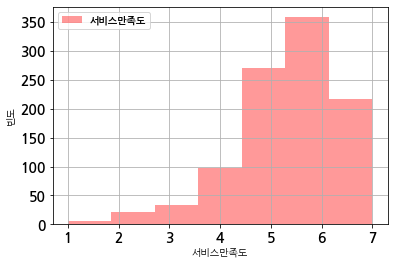

In [10]:
import matplotlib
import matplotlib.pyplot as plt

# # 한글깨짐현상 방지
# matplotlib.rcParams['font.family'] = "Malgun Gothic"

# 마이너스(-) 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 히스토그램 작성
%matplotlib inline
plt.hist(df['서비스_만족도'], alpha=0.4, bins=7, rwidth=1, color='red', label='서비스만족도') 
                              #투명도  #계급개수 #bar사이간격
# 각종 옵션설정
plt.legend()
plt.grid()
plt.xlabel('서비스만족도')
plt.ylabel('빈도')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- 해석
    + 시각화 결과 서비스만족도는 5, 6, 7점에 대부분 분포
    + 6점, 5점, 7점 순으로 가장 높은 빈도 수
    + 대체적으로 A 쇼핑몰의 서비스 만족도는 높게 평가됨
    + 낮은 만족도의 소수 고객들에 대한 불만족 원인 파악 및 개선 필요

### (2) 산점도: 두 변수의 연관성 정도 파악
- 두 변수들 간의 관계를 좌표평면 상의 점으로 나타내는 방법
- 하지만, 두 변수간의 상관계수와 같은 통계적 검증 별도 진행 필요


- (예시) 방문빈도 높은 고객들이 대체적으로 총 매출액이 높게 나타나는가?

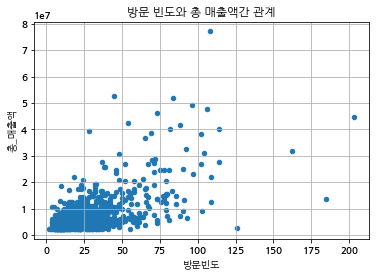

In [13]:
# 마이너스(-) 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline
df.plot.scatter(x='방문빈도',y='총_매출액',grid=True,title='방문 빈도와 총 매출액간 관계')

- 해석
  + 방문빈도와 총 매출액 간 상관관계 어느 정도 존재
  + 누적 방문빈도 50회 전후: 방문빈도에 따라 매출액의 증가가 비교적 명확
  + 누적 방문빈도 50회 이후: 매출액의 편차 큼
- 결론: 우량고객 되기 전까지는 매장방문 유도, 우량고객 된 이후에는 방문당 구매액 증대 전략

### (3) 파이차트: 특정 변수의 각 항목별 비율
- 명목형 척도의 변수 각 항목에 대한 비율 시각화


- (예시) 구매유형 별 고객들의 분포를 확인해보자

In [19]:
# 구매유형별 고객 그룹화하기
groupby_구매유형 = df.groupby('구매유형')
groupby_구매유형.describe()

고객ID                                        ...  전문성                    
      count        mean         std   min     25%  ...  min  25%  50%  75%  max
구매유형                                               ...                         
1      43.0  523.186047  286.875886   7.0  290.50  ...  4.0  5.0  6.0  6.0  7.0
2     317.0  476.406940  282.585411   5.0  223.00  ...  3.0  5.0  6.0  6.0  7.0
3     144.0  514.868056  287.815069  19.0  290.25  ...  4.0  5.0  6.0  6.0  7.0
4     496.0  509.760081  293.080306   1.0  244.75  ...  3.0  5.0  6.0  6.0  7.0

[4 rows x 304 columns]

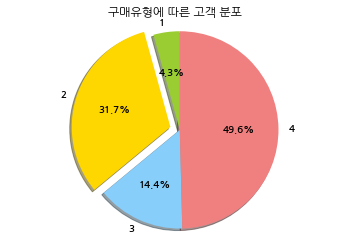

In [25]:
# 마이너스(-) 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 파이차트 속성 지정
labels = ['1','2','3','4'] # 라벨 지정
sizes = [43, 317,144, 496] # 각 그룹별 크기(고객수) 지정
colors = ['yellowgreen','gold','lightskyblue','lightcoral'] # 색 지정
explode = (0, 0.1, 0, 0) # 특정그룹에 대한 시각적인 분리 수준 결정

# 파이차트 작성하기
%matplotlib inline
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
                                                              #각범주가데이터에서차지하는비율(소수점 한 자리 방식의 %표기)
plt.axis('equal')
plt.title('구매유형에 따른 고객 분포')
plt.show()

- 해석
  + 전체 고객의 약 50%가 4번 그룹(집중 구매형 고객군)
  + 1번 그룹(1회성 구매형)이 가장 적은 고객
    + 참고. 본 데이터는 vip 고객들만 추출한 데이터

### (4) 상자그림: 분포의 형태를 정의하는 다양한 통계량 제시
- 수치형 변수의 분포적 특성을 자세히 나타내는 시각화 도구
  + 최소값, 최대값, 평균
  + Q1(제1사분위수): 25%
  + Q2(제2사분위수): 50%
  + Q3(제3사분위수): 75%
- (Q1-최소값) = (최대값-Q3): 좌우대칭 분포
- (Q1-최소값) < (최대값-Q3): 왼쪽에 꼬리를 가진 분포
- (Q1-최소값) > (최대값-Q3): 오른쪽에 꼬리를 가진 분포


- (예시) 고객들에게 제공하는 할인쿠폰이 실제 성별에 따라 얼마나 활용되는가?  
차이가 있다면 성별에 따른 차등적 할인쿠폰 제공 고려해보자

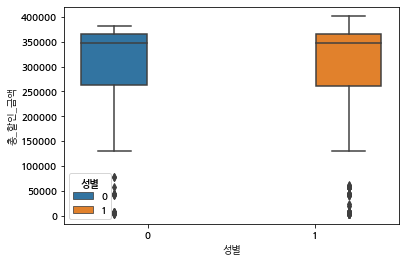

In [26]:
# 마이너스(-) 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 상자그림 작성하기
%matplotlib inline
sns.boxplot(x='성별',y='총_할인_금액',hue='성별',data=df)

- 해석
  + 여성의 최대 할인금액이 남성보다 높음
  + 그 외에 최소값, 평균, 제1사분위, 2사분위, 3사분위 차이 크지 않음
  + 성별에 따른 할인쿠폰 제도 변화 불필요